
## 1. Initial Data Cleaning and Data Exploration 
#### Written by: Isobel Jones
#### Date: 6th of June
## THIS NOTEBOOK WILL NOT BE ABLE TO RUN AS CONTAINS INGESTED DATA  FILE CONTAINS PII DATA

1. Read in the data and give more appropiate column names
2. Take initialy look at data (how many tweets, how many null values, how many different categories)
3. Aggregate case_types according to the Customer Experiance teams consolidated Case_types
4. Remove any tweets that do not contain @RoyalMail as these will likely be from the Customer Experiance team
5. Save data into csv for the next stage Data Transformation
6. Plot the overall distribution of length of strings in each entry.
7. Produce CDF of Tweets by Number of Characters
8. Pseudonymize names

In [1]:
import os
import pickle
import operator
import pandas as pd
import numpy as np
import gocept.pseudonymize
import matplotlib.pyplot as plt

Get Root working dirctory

In [36]:
rootwd = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
print('Root Working Directory:\n\n', rootwd)

Root Working Directory:

 /Users/isobeljones/DataScience/topic-labelling-system


#### 1. Read in the data and give more appropiate column names

In [3]:
raw_tweets_df = pd.read_csv(rootwd +'/data/rawTweets.csv', 
                            names=['Tweet','Permalink','Case_Type','Category','Sub_Category'])

# Remove first row as headers given by Customer Experiance team
raw_tweets_df = raw_tweets_df.iloc[1:]

Check the data has correctly converted to dataframe and take initial look at data

In [4]:
raw_tweets_df.head(100)

,Tweet,Permalink,Case_Type,Category,Sub_Category
1,@RoyalMail Hey could you please check your DM'...,https://twitter.com/sarahdignam/status/9441786...,Find My Item,Find My Item,RM Signed For
2,@PostOffice @RoyalMail @RoyalMail I haven't ha...,https://twitter.com/C_Greg7/status/95072417830...,NaN,NaN,NaN
3,I world appreciate an answer\nI’ve been waitin...,NaN,Find My Item,Find My Item,International Inbound
4,I'm really sorry it's still not arrived. If it...,NaN,Find My Item,Find My Item,International Inbound
5,"@GTTURBO_ Hi, I'm really sorry to hear this ha...",https://twitter.com/RoyalMail/status/883961670...,General Enquiry,Providing Information,Service
6,@GTTURBO_ issues in your local area? MT,https://twitter.com/RoyalMail/status/883961671...,General Enquiry,Providing Information,Service
7,"@rawrrawrlok_ Hi, I'm sorry for the delayed re...",https://twitter.com/RoyalMail/status/883963156...,Find My Item,Find My Item,2nd Class
8,@rawrrawrlok_ yet. 2nd class items aren't full...,https://twitter.com/RoyalMail/status/883963180...,Find My Item,Find My Item,2nd Class
9,@rawrrawrlok_ deemed as delayed. If it hasn't ...,https://twitter.com/RoyalMail/status/883963306...,Find My Item,Find My Item,2nd Class
10,"@rsiddaddy Hi, I'm sorry for the delay in gett...",https://twitter.com/RoyalMail/status/935852280...,Complaint,Complaint,P739 (Something for you) related


#### 2. Take initialy look at data (how many tweets, how many null values, how many different categories) 

In [5]:
print('Total number of raw tweets: ', len(raw_tweets_df))
print('Count of Null values in each column: \n \n' , raw_tweets_df.isnull().sum())
#Drop the null values from Case_type column
#raw_tweets_df = raw_tweets_df[raw_tweets_df.Case_Type.notnull()]

Total number of raw tweets:  24994
Count of Null values in each column: 
 
 Tweet              0
Permalink          2
Case_Type       4679
Category        4583
Sub_Category    8060
dtype: int64


In [6]:
24994 / 1095

22.82557077625571

In [7]:
raw_tweets_df.groupby(['Case_Type']).agg(['count'])

,Tweet,Permalink,Category,Sub_Category
,count,count,count,count
Case_Type,,,,
Campaign Engagement,20,20,20,18
Complaint,9029,9029,8995,8496
Customer Account Support,2,2,2,2
Engagement,2997,2997,2977,1188
Find My Item,4990,4988,4970,4525
General Enquiry,1439,1439,1421,1046
High Priority,5,5,4,0
Positive Feedback,339,339,337,302


Make a copy of the dataframe

In [8]:
tweets_df = raw_tweets_df.copy()
tweets_df = tweets_df.drop(['Permalink','Sub_Category','Category'], axis=1)

#### 3. Aggregate case_types according to the Customer Experiance teams consolidated Case_types

In [9]:
#Aggregate case_types according to the Customer Experiance teams consolidated Case_types
tweets_df.Case_Type = tweets_df.Case_Type.map({
                                                'Complaint':'Complaint',
                                                'Campaign Engagement': 'Engagement',
                                                'Engagement':'Engagement',
                                                'Find My Item':'Find My Item',
                                                'General Enquiry':'Enquiry',
                                                'Providing Information':'Enquiry',
                                                'Customer Account Support':'Other',
                                                'High Priority':'Other',
                                                'Positive Feedback':'Other',
                                                'Spam': 'Other'
                                            })

Remove the first row as this is the titles of the dataframe

In [10]:
tweets_df = tweets_df.iloc[1:]

In [11]:
print('Total number of tweets: ', len(tweets_df))
grouped_tweets_df = tweets_df.groupby(['Case_Type']).agg(['count'])
grouped_tweets_df['Percentage'] = (grouped_tweets_df['Tweet']['count']/len(tweets_df))*100
grouped_tweets_df

Total number of tweets:  24993


,Tweet,Percentage
,count,
Case_Type,,
Complaint,9029,36.126115
Engagement,3017,12.071380
Enquiry,2888,11.555235
Find My Item,4989,19.961589
Other,391,1.564438


There is a large class imbalance for this data. Specifically for the Case_Type 'Other'.

#### 4. Remove any tweets that do not contain @RoyalMail as these will likely be from the Customer Experiance team

In [12]:
# Work out number of tweets containing the mention @RoyalMail
len([i for i,item in enumerate(tweets_df.Tweet) if "@RoyalMail" in item])

#Return only tweets containing @RoyalMail
Royalmaillist = [(i,item) for i,item in enumerate(tweets_df.Tweet) if "@RoyalMail" in item]

#Convert list of tweets to pandas DataFrame
Royalmaillist_df = pd.DataFrame(Royalmaillist)

#et the index to original id's ready for merge
Royalmaillist_df = Royalmaillist_df.set_index(0)

#Merge the original dataframe with only the @RoyalMail tweets so that we can include the Case_type
Royalmaillist_df = Royalmaillist_df.merge(tweets_df,left_index=True,right_index=True)

#Drop the redundant column of tweets
Royalmaillist_df = Royalmaillist_df.drop(columns=1)

In [13]:
tweets_df.iloc[271]

Tweet        @RoyalMail which I can only do between 6.45am ...
Case_Type                                                  NaN
Name: 273, dtype: object

In [14]:
[print(i,item) for i,item in enumerate(tweets_df.Tweet) if "royal" in item]

64 Extremely annoyed at the local @auspost postie and @RoyalMail for their flimsy packaging. #davidbowie #royalmail https://t.co/i2L28qRIYc
65 Really annoyed with the @auspost postie and with @RoyalMail for weak packaging. #davidbowie #royalmail #auspost https://t.co/UwxXpKZFGa
87 @royalmail amazing new artwork for #stamps released in March for #DavidBowie https://t.co/FTof15RWlx
98 @royalmail Posted as 1st class at post office on 28th (1:15pm) as Signed For, and it still have not arrived yet. Any ideas why? Thanks.
195 @southhamscab @royalmail an interesting post😅
235 Another letter found in the bottom of a .@royalmail mail sack. Send 1st class by someone... #lostmail #delkin https://t.co/fV69ykNZMQ
300 @RoyalMail Hello, can you give me a contact number for royal mail to discuss employee issues please. thanks
320 @royalmail You tried to deliver my 'guaranteed next day delivery' letter in Scotland once, at 7.18 AM. Then SENT IT BACK TO LONDON! Explain?
323 This very dangerous @RoyalMai

10433 @royalmail Also no POD on other recorded items sent the day after which HAVE been delivered. Again, WTF?
10453 @royalmail @PostOffice my post keeps going missing. Been happening for months. Is my postman stealing it? Help me asap please!
10481 @PostOffice @RoyalMail Tagged you by accident royal mail. Apologies.
10519 @royalmail can i pay my customs fee with cash at the delivery office? my card says i can't pay with credit/debit card but is cash ok?
10529 @RoyalMail the clue is in the outside of the envelope #royalmail https://t.co/k3WW5UI36d
10601 My shares in the @royalmailnews @RoyalMail are not up for sale to @jeremycorbyn and @UKLabour at any price!
10667 @Adrian_Hilton @toadmeister @RoyalMail peter lilley tried his damndest against the royal mail and wee alky edward leigh too.
10733 @RoyalMail no reply no change from royal mail service. Parcel left at doorstep! No complaints heard! https://t.co/KQ3LluZPO9
10783 Morning @royalmailnews @RoyalMail here's 1 for you...do I keep p

22036 @RoyalMail @iingwen Dear : I've received a package from UK by royalmail, the address is INCORRECT, TAIWAN is NOT a province of China. B.R. https://t.co/Oopayk0kxz
22041 @royalmail is it normal for track &amp; trace to take over 4 days to deliver &amp; not update on the track info?
22077 @LucyEJames Have you spoken to @royalmail about this? - Jess
22080 @LucyEJames As it was given to the Postman you'll need to get in touch with @royalmail as they can help you find the item. - Jess
22084 @esosa_lily I'm sorry to hear that. You'll need to get in touch with @royalmail as they deliver the mail. - Jess
22100 @RoyalMail stealing post and delivering empty envelopes. Happy birthday to me! #royalmail #stolenpost https://t.co/jE9EhEYEGg
22148 @RoyalMail final response - 'no evidence was provided'-you replied to the email with the evidence! #royalmail #pathetic #passingthebuck
22152 @royalmail Gold postbox on Hanover Street, Edinburgh has collection tab reading Wednesday - is this right? I j

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [15]:
raw_tweets_df['pre_clean_len'] = [len(t) for t in raw_tweets_df.Tweet]
#Reset the index so that the ids numbers are more suited to the data
Royalmaillist_df = Royalmaillist_df.reset_index(drop=True)

#### 5. Save data into csv for the next stage Data Transformation

In [16]:
Royalmaillist_df.to_csv(rootwd +'/data/cleanedTweets.csv')

In [17]:
Royalmaillist_df[0:10]

,Tweet,Case_Type
0,"@Destiny17783043 Hi, I don't have an update or...",Complaint
1,"@Destiny17783043 Hi Destiny, can you DM us you...",Complaint
2,@AskeBay that your way of not bothering? You d...,Enquiry
3,Reeeeally starting to wish that either @RoyalM...,Complaint
4,@RoyalMail please can you update me with this ...,Find My Item
5,"@RoyalMail hi I am trying to track my parcel, ...",Find My Item
6,@RoyalMail I have a parcel that was due to be ...,Complaint
7,@RoyalMail And now it's not working again? Thi...,NaN
8,@RoyalMail trying to view policy certificate f...,Enquiry
9,@RoyalMail This is not a 'safe location'. What...,Complaint


In [18]:
print("Number of tweets pre Data Cleaning:", len(raw_tweets_df))
print("Number of tweets post Data Cleaning:", len(Royalmaillist_df))
percentageOfTweetsLost = (1-len(Royalmaillist_df)/len(raw_tweets_df))*100
print("Percentage of Tweets lost:", percentageOfTweetsLost)

Number of tweets pre Data Cleaning: 24994
Number of tweets post Data Cleaning: 23983
Percentage of Tweets lost: 4.044970792990322


#### 6. Plot the overall distribution of length of strings in each entry.

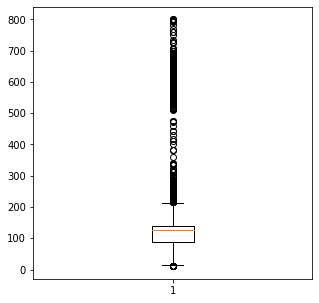

In [19]:
#Plot the overall distribution of length of strings in each entry.
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(raw_tweets_df.pre_clean_len)
plt.ylabel
plt.show()

/Users/isobeljones/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, 'All Tweets')

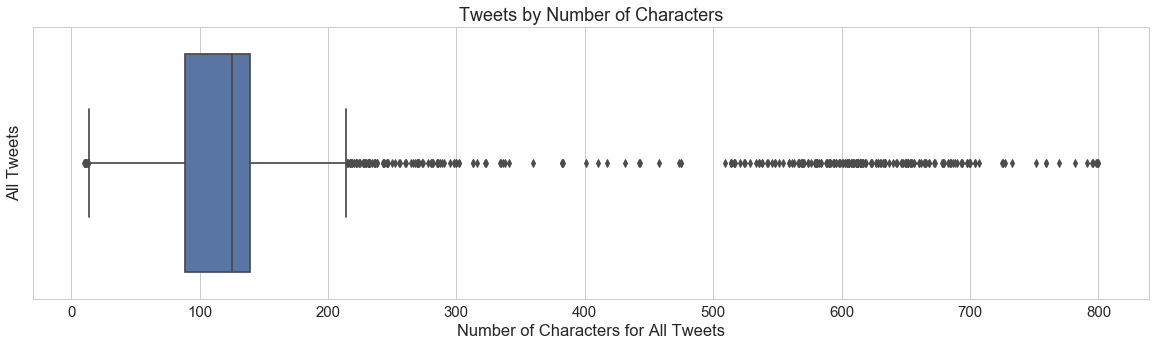

In [20]:
import seaborn as sns
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize':(20,5)}, font_scale=1.5,)
ax = sns.boxplot(x=raw_tweets_df.pre_clean_len)
ax.set_title("Tweets by Number of Characters")
ax.set_xlabel("Number of Characters for All Tweets")
ax.set_ylabel('All Tweets')

In [21]:
#### 7. Produce CDF of Tweets by Number of Characters

In [22]:
import numpy as np
import matplotlib.pyplot as plt
raw_tweets_df.pre_clean_len.as_matrix()

/Users/isobeljones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([116, 250, 144, ..., 139,  90, 140])

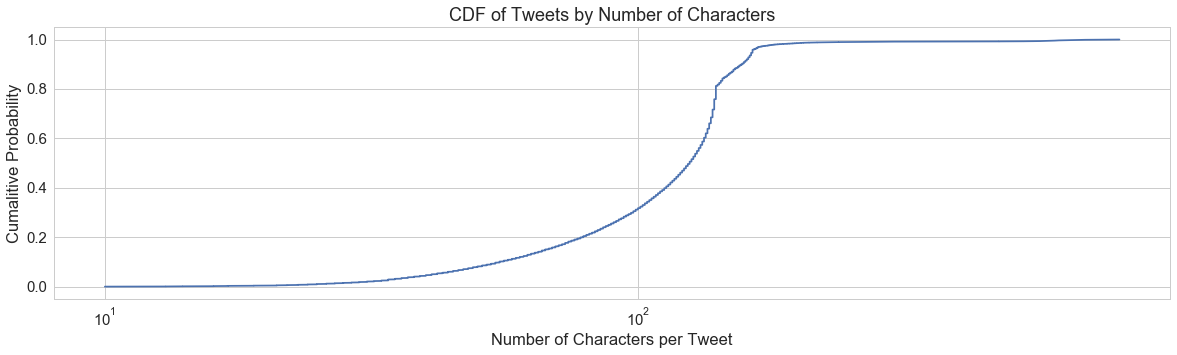

In [23]:
sorted_data = np.sort(raw_tweets_df.pre_clean_len[:24700])
sorted_data= sorted_data
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data,yvals)
plt.xscale("log")
plt.xlabel("Number of Characters per Tweet")
plt.ylabel("Cumalitive Probability")
plt.title("CDF of Tweets by Number of Characters")

plt.show()

This looks a bit strange, since the twitter’s character limit is 140. But from the above box plot, some of the tweets are far greater than the 280 twitter limit on words. 

Need to take a look at tweets which have more than 280 characters

In [24]:
#Extend width of columns so can read the full length of a tweet 
pd.set_option('display.max_colwidth', -1)
raw_tweets_df[raw_tweets_df.pre_clean_len > 280].Tweet.head(5)

358    @mrkhndy @capnbobfrapples @Biltawulf @Lukemackaycooks @POTUS @Madonna @kylieminogue @FBI @BFI @BandQ @sainsburys @Tesco @mouthwaite @OGJOnline @TinieTempah @Morrisons @Garfield @Pret @BBC_TopGear @chrissyteigen @johnlegend @Baddiel @NicolaAdamsOBE @katyperry @amamaknox @PressSec @jameshaskell @WayneRooney @SamanthaQuek @samwarburton_ @officialabbafan @OfficialBWFC I believe in us. We have the technology. @ZaweAshton @jackwhitehall @RoyalMail @Experian_US
420    @amarapatel @mikebutcher @DreKoval @vgul @winjer @azeem @twehmeier @kadhimshubber @mediaczar @mr_james_c @hare_brain @jbrazao @evilczar @GWR @atomico @ladyxtel @TheEuropas @mk1969 @lynseybarber @eileentso @axelheitmueller @SteveLaitner @ddunlop @4anya @MaybeCapital @matthewdeaners @john_field .btw @jack @WhatsApp has groups... ikr!\n\nThere are some ppl who can make this pig sing... @Wendys @katie_martin_fx @RoyalMail @sainsburys                         
423    @BetterCity @amarapatel @mikebutcher @DreKoval @vgul @winjer 





Address have beel included as well as @mentions. More Data Preprocessing will need to happen as currently the tweets contain a lot of noise e.g '\n' and 'https://address' 

#### 8. Pseudonymize names

In [25]:
file_name = rootwd +'/data/twitterhandles.dump'

#Open the file for reading
fileObject = open(file_name,'rb')

# load the object from the file into var b
loadedTweets = pickle.load(fileObject)

In [26]:
featureDict = {}
# Returns a dictionary containing features as keys, and weights as values

def tofeatureDict(tokens):
    v = {}
    for t in tokens:
        if t in featureDict:
            featureDict[t] = featureDict[t] + 1
        else: 
            featureDict[t] = 0 
        if t in v:
            v[t] = v[t] + 1
        else:
            v[t] = 1
    return v

In [27]:
name = []
for x in loadedTweets:
    name.append(tofeatureDict(x))

In [28]:
v = {}
for j in range(0,len(loadedTweets)-1):
    for x in loadedTweets[j]:
        if x in v:
            v[x] = v[x] + 1
        else:
            v[x] = 1

In [29]:
sorted_x = sorted(v.items(), key=operator.itemgetter(1))
sorted_x[-10:]

[]

In [30]:
listnames = list(v.keys())

In [32]:
##tweetxamp needs to be each individual tweet
# for x in range(0,len(Royalmaillist_df)-1):
#     for tag in listnames:
#        Royalmaillist_df.Tweet[x] = Royalmaillist_df.Tweet[x].replace(tag, gocept.pseudonymize.name(tag,'secret'))
# print (Royalmaillist_df.Tweet[1])